# Introduction to DL NLP with BoW

In this tutorial, we will cover:

- Simple BoW model on ready processed `keras.datasets.imdb`.
- NLP data pre-processing on `aclimbd` raw data set.
- Text binarization using keras `Tokenizer`
- Text features using both sklearn and keras Tokenizer: `binary`, `count`, `freq` and `tfidf`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models , layers , losses , metrics , optimizers
from tensorflow.keras.utils import plot_model
from sklearn.feature_extraction.text import CountVectorizer #لقراءة النصوص الطويلة والقيام بعمل معالجة لها
#CountVectrorizer ==>  تقوم بقراءة النصوص األطول , وحذف الكلمات المألوفة , ثم عمل وظيفة مشابهة لوظيفة مشابهة الي LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download NLTK
1. **from nltk.tokenize import word_tokenize**
*  The word_tokenize function ==> is used to split a text into individual words or tokens.
* It uses various rules and heuristics to determine the boundaries between words.
* It can handle different types of text, including sentences, paragraphs, or even entire documents.

2. **from nltk.corpus import stopwords ,stop_words = stopwords.words('english')**
* Stopwords are commonly used words in a language (e.g., "is", "the", "and")
* that are considered to have little or no significance in text analysis and natural language processing tasks.
* These words are often removed from text data to reduce noise and improve the quality of analysis.


3. **from nltk.corpus import wordnet**
* Sure! The nltk.corpus. ==> wordnet module in NLTK (Natural Language Toolkit) provides access to WordNet,
* which is a large lexical database for the English language. WordNet is a widely used resource in natural language processing and computational linguistics.

In [3]:
nltk.download('punket') # Download NLTK(punket) Function
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
#Sure! The PorterStemmer class from the nltk.stem.porter module is a widely used stemming algorithm for English words.
# Stemming is the process of reducing words to their base or root form, which helps in information retrieval tasks and text mining.
# Example Running ==> After Applying Stemming ==> Run
from nltk.stem import WordNetLemmatizer
# am ,is , are ==> After Applying Lemmatizer ==> be

[nltk_data] Error loading punket: Package 'punket' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Classifying movie reviews with BoW model
__Core ideas:__

1- How text is represented in ML/DL (vocab)

2- Simple Dense keras model

3- Binary classification loss and activation

## The IMDB dataset


We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to
train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and
what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously
you don't need your model to predict those). For instance, it is possible that your model could end up merely _memorizing_ a mapping between
your training samples and their targets -- which would be completely useless for the task of predicting targets for data never seen before.
We will go over this point in much more detail in the next chapter.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words)
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

# Download Data & Divided To
1. train_data & Test_data
2. Train_Labels & Test_Labels

In [4]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step



The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words).
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [5]:
train_data[0] # Show Index = 0 In Train_data

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0] # Show Index = 0 in Train Labels

1

**Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:**

In [7]:
max([max(sequence) for sequence in train_data])

9999

**For kicks, here's how you can quickly decode one of these reviews back to English words:**
* 1. ==> **we decode the review , note that our indices were offest by 3**
* 1.1 **Because 0 , 1 & 2 are reversed indices for "padding" , "start of sequence" , and "Unknown"**
* 1.2 **0 ==> Padding   , 1 ==> Start Of Sequence    , 2 ==> Unknown**

* 2. ==> **.join() method is used to concatenate elements of a sequence (such as a list or a tuple) into a string.**
* 2.1 **Example ==> my_list = ['Hello', 'World', 'Python'] , result = ' '.join(my_list) , print(result) ==> Hello World Python**

In [11]:
#Word index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
#word_index
# We Reverse it , mapping integer indices to words
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
#we decode the review , note that our indices were offest by 3
#Because 0 , 1 & 2 are reversed indices for "padding" , "start of sequence" , and "Unknown"
# 0 ==> Padding   , 1 ==> Start Of Sequence    , 2 ==> Unknown
decode_review = ' '.join([reverse_word_index.get(i-3 , '?') for i in train_data[0]])

* **display decode review**

In [12]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Bag of Words

The term BoW is used in many different occasions in NLP. In general, it referes to treating every word equally as the others, without consideration of sequential information of the sentence or document. In other words, the context of the words is not considered.

In some settings, words in the bag are summed, averaged,...etc (or their vectors). In other settings, they are simply mutlipled by different _learnable_ weighting. This is the case we will consider. We will use the `Dense` layer, applied to a _long_ vector of 1's and 0's. The length of that vector is the same as the number of words in our vocab (we specified when loading the data above using the `num_words` param). We will have such vector for every sentence/document of the data. Whenever a word of the vocab is mentioned, we set the corresponding location to 1. Otherwise, it's 0.

__You can imagine how sparse and inefficient is that vector!__

__In this setting, we are treating the mention or absence of a word as a feature__

The `Dense` layer will assign a _learnable_ weight to each word location. If the word is mentioned, that weight will be multiplied by 1, else it's 0. Then the output of the `Dense` is a number of neurons (hyper param), each represents different weighting of the input long vector of features/words.

The next layers, are just further _refinements_ of the learnt features from the previous layers. Until we reach the final layer, which produces 1 or k outputs according to the problem or task (binary or multi classification).

__Pros__:
- All words are normalized, regardless of their index in the vocab

__Cons__:

- Sparsity = inefficiency = A lot of useless features = confusion of the model = unnecessary big model = more overfitting

- Need to pad to max (again inefficiency):

This model, requires ALL the data samples to have the same length, sense the `Dense` layer cannot handle variable length input (weight matrix is fixed). This mandates to perform padding

- No context = no sequence = hard to model co-reference, sarcasm, negation...etc

_Example_

Such BoW model has no clue to differentiate the following cases:

- This movie is good --> +

- This movie is bad --> -

- This movie is not good --> -

- This movie is not bad --> +

Simple because it cannot link the context of the words "good" and "bad" to the negatition or affirmation context "not"



## Preparing the data


We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`,
then use as first layer in our network a layer capable of handling such integer tensors (the `Embedding` layer, which we will cover in
detail later).
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence
`[3, 5]` into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as
first layer in our network a `Dense` layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

* **enumerate() is a built-in function used to iterate over a sequence while keeping track of the index of each item. It takes an iterable (such as a list, tuple, or string) as input and returns an iterator that generates pairs containing the index and the corresponding item of the iterable.**

* Example
1. fruits = ['apple', 'banana', 'mango']
2. for index, fruit in enumerate(fruits): print(index, fruit)
* 0 apple
* 1 banana
* 2 mango

In [13]:
def vectorize_sequences(sequences , dimension = 10000):
  #First --> Create an all_zero matrix of shape (len(sequences),dimension)
  results = np.zeros((len(sequences), dimension))
  #Create Loop because built-in function used to iterate over a sequence while keeping track of the index of each item
  for i , sequence in enumerate(sequences):
    results[i , sequence] = 1. #set specific indices of results[i] to 1s
  return results
# Our Vectorized training data
x_train = vectorize_sequences(train_data)
# Our Vectorized test data
x_test = vectorize_sequences(test_data)

* Show X_train[0]

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

*  ** `asarray` is a function provided by the NumPy library. It is used to convert a given input into an array.**

In [15]:
#Convert train_labels to array , type --> convert to float32
y_train = np.asarray(train_labels).astype('float32')
#Convert test_labels to array , type --> convert to float32
y_test = np.asarray(test_labels).astype('float32')

# Now our data is ready to be fed into a neural network.

## Building our network


Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of
network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16,
activation='relu')`

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer. What's a hidden unit? It's a dimension
in the representation space of the layer. You may remember from the previous chapter that each such `Dense` layer with a `relu` activation implements
the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the
input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). You can
intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when
learning internal representations". Having more hidden units (a higher-dimensional representation space) allows your network to learn more
complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that
will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such stack of dense layers:

* How many layers to use.
* How many "hidden units" to chose for each layer.

In the next chapter, you will learn formal principles to guide you in making these choices.
For the time being, you will have to trust us with the following architecture choice:
two intermediate layers with 16 hidden units each,
and a third layer which will output the scalar prediction regarding the sentiment of the current review.
The intermediate layers will use `relu` as their "activation function",
and the final layer will use a sigmoid activation so as to output a probability
(a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive).
A `relu` (rectified linear unit) is a function meant to zero-out negative values,
while a sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

Here's what our network looks like:

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

* **And here's thae Keras implementation, very similar to the MNIST example you saw previously:**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units = 16 , activation = 'relu' , input_shape = (10000,), name = 'Hidden_Layer1'))
model.add(Dense(units = 16 , activation = 'relu', name ='Hidden_Layer2'))
model.add(Dense(units = 1  , activation = 'sigmoid', name = 'Output_Layer'))

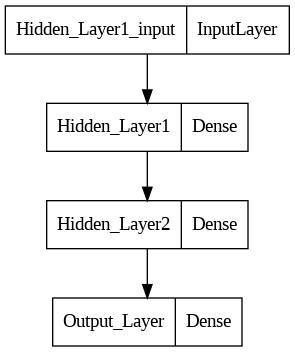

In [19]:
plot_model(model)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer1 (Dense)       (None, 16)                160016    
                                                                 
 Hidden_Layer2 (Dense)       (None, 16)                272       
                                                                 
 Output_Layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________



Lastly, we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network
is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss.
It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you
are dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the "distance"
between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will
also monitor accuracy during training.

In [21]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [22]:
model.compile(optimizer=optimizers.RMSprop(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'] )

## Validating our approach

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by
setting apart 10,000 samples from the original training data:

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512
samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the
validation data as the `validation_data` argument:

In [26]:
history = model.fit(partial_x_train , partial_y_train,epochs=20 , batch_size=512 ,validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.5342 - accuracy: 0.7766 - val_loss: 0.4029 - val_accuracy: 0.8614
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3199 - accuracy: 0.9017 - val_loss: 0.3170 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2321 - accuracy: 0.9268 - val_loss: 0.2957 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1784 - accuracy: 0.9446 - val_loss: 0.2757 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1476 - accuracy: 0.9538 - val_loss: 0.3004 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1183 - accuracy: 0.9636 - val_loss: 0.3053 - val_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0965 - accuracy: 0.9716 - val_loss: 0.3255 - val_accuracy: 0.8821
Epoch 8/20
30

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause
as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data
about everything that happened during training. Let's take a look at it:

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the
training and validation loss side by side, as well as the training and validation accuracy:

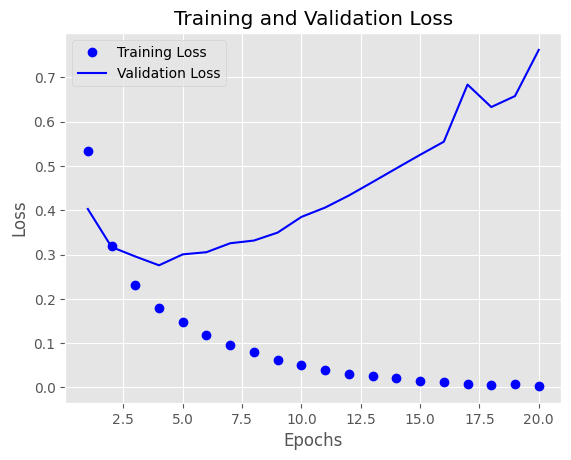

In [31]:
plt.style.use('ggplot')
acc = history.history['val_accuracy']
val_acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1 , len(acc)+1)
# "bo" is for 'blue dot '
plt.plot(epochs, loss , 'bo' ,label = 'Training Loss')
# 'b' is for 'solid blue line'
plt.plot(epochs , val_loss , 'b' , label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

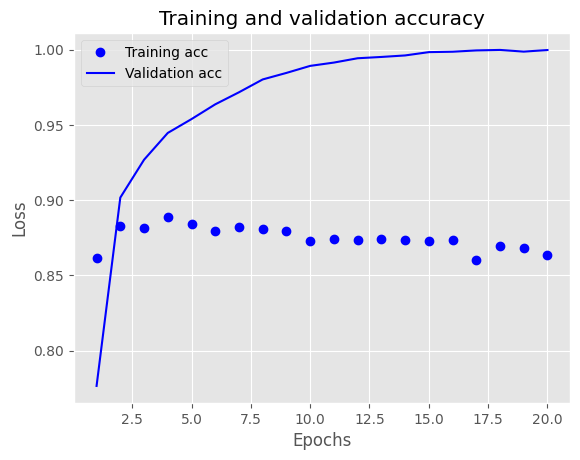

In [32]:
plt.clf()   # clear figure
acc_values = history_dict['val_accuracy']
val_acc_values = history_dict['accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()